In [116]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
from pandas import DataFrame
from pandas import Grouper

In [380]:
data=pd.read_csv("GDP_training.csv",header=0, index_col=0,parse_dates=True,squeeze=True)
data.head()

Time
1959-03-31    75.554000
1959-06-30    85.116000
1959-09-30    80.217340
1959-12-31    68.598515
1960-03-31    81.193195
Name: GDP, dtype: float64

In [381]:
real_data=data

In [ ]:
#Plotting AutoCorrelation

In [320]:
from statsmodels.graphics.tsaplots import plot_acf

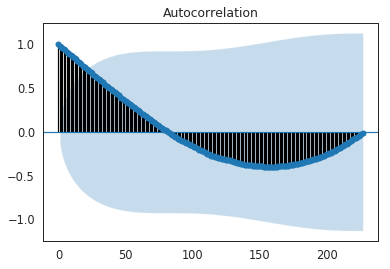

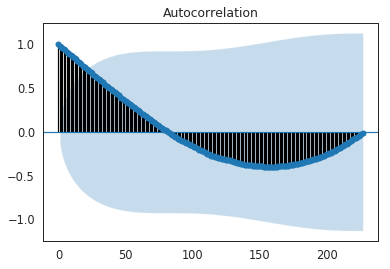

In [321]:
plot_acf(data)

In [ ]:
# Plotting Partial Correleation 

In [322]:
from statsmodels.graphics.tsaplots import plot_pacf

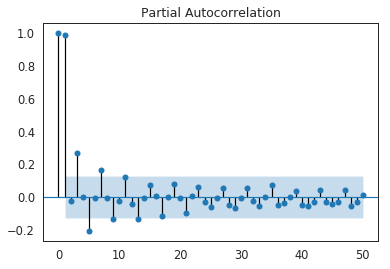

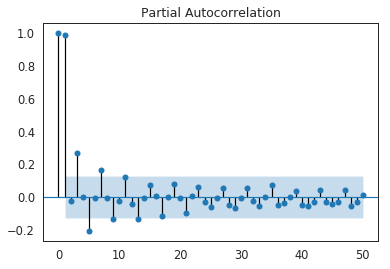

In [324]:
plot_pacf(data, lags=50)

In [153]:
data.describe()

count    228.000000
mean     214.299372
std      106.763672
min       68.598515
25%      121.021183
50%      189.921400
75%      301.328558
max      435.791575
Name: GDP, dtype: float64

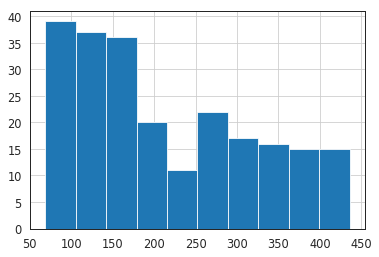

In [154]:
data.hist()

In [155]:
data.head(5)

Time
1959-03-31    75.554000
1959-06-30    85.116000
1959-09-30    80.217340
1959-12-31    68.598515
1960-03-31    81.193195
Name: GDP, dtype: float64

In [ ]:
#Plotting General GDP Distribution

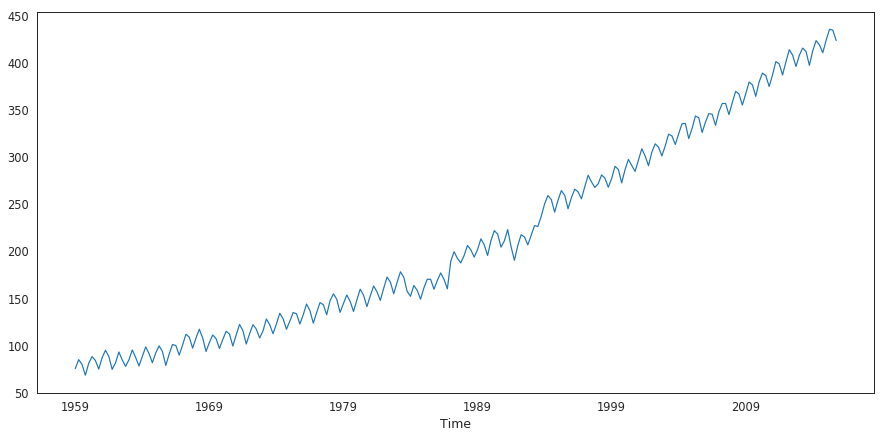

In [156]:
data.plot(figsize=(15,7))
plt.show()

In [ ]:
#Plotting Box Plot to see the value distribution 

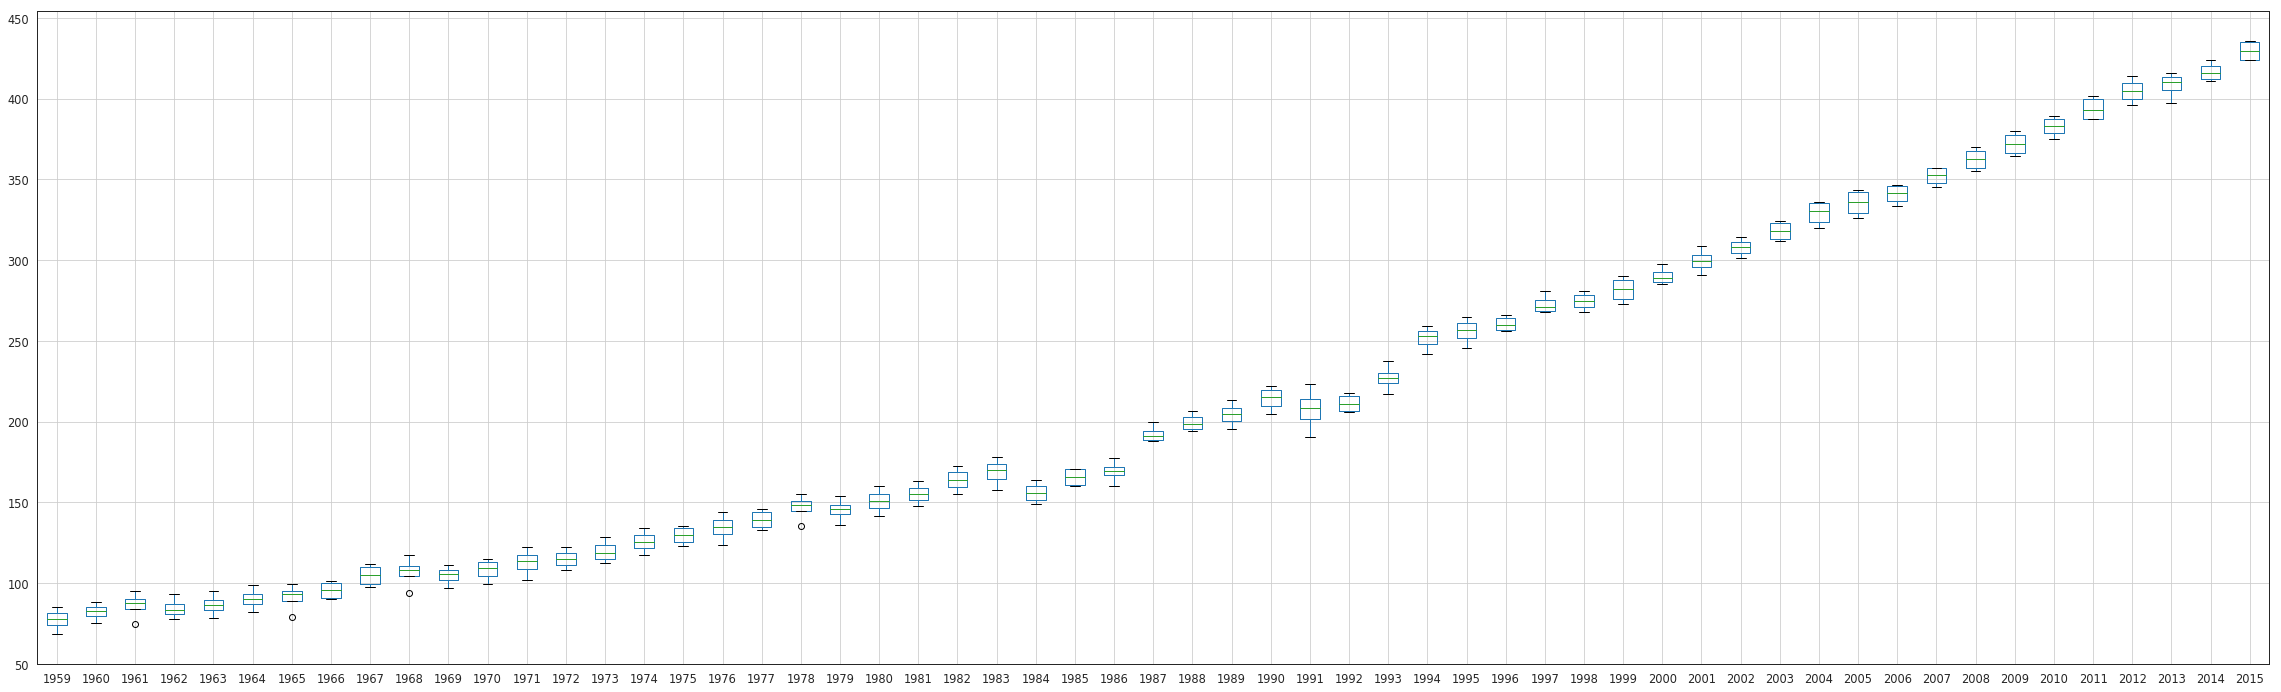

In [157]:
groups = data.groupby(Grouper(freq='A'))
years = DataFrame()
for name, group in groups:
    years[name.year] = group.values
plt.figure(figsize=(40,12))
years.boxplot()
plt.show()

In [ ]:
#######################################################################################################

Long Short Term Memory (LSTM , RNN ) Deep Learning Method 

######################################################################################################

In [122]:
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

In [215]:
np.random.seed(7)

In [331]:
data2=pd.read_csv("GDP_training.csv",usecols=[1], engine='python')

In [332]:
X=data2.values
X=X.astype('float32')

In [ ]:
# Scaling between 0 and 1 as LSTM is senstive to wide range values

In [333]:
scaler = MinMaxScaler(feature_range=(0, 1))
X = scaler.fit_transform(X)

In [334]:
X

array([[0.01894231],
       [0.0449831 ],
       [0.03164227],
       [0.        ],
       [0.0342999 ],
       [0.05379766],
       [0.04241186],
       [0.01766029],
       [0.050603  ],
       [0.07221088],
       [0.05424379],
       [0.01688997],
       [0.03599793],
       [0.06712386],
       [0.04415727],
       [0.02553158],
       [0.04454572],
       [0.07300764],
       [0.05145796],
       [0.02664667],
       [0.05451107],
       [0.08188298],
       [0.0625726 ],
       [0.0361335 ],
       [0.06432316],
       [0.08485284],
       [0.06839317],
       [0.0282052 ],
       [0.06088191],
       [0.08886775],
       [0.085769  ],
       [0.0579886 ],
       [0.08689192],
       [0.11824259],
       [0.11009744],
       [0.07826504],
       [0.10717428],
       [0.13282931],
       [0.10783967],
       [0.06856042],
       [0.09448549],
       [0.11622071],
       [0.1056942 ],
       [0.07723644],
       [0.10308322],
       [0.12702915],
       [0.11892116],
       [0.084

In [ ]:
#Splitting train set

In [335]:
train_size = int(len(X) * 0.80)
test_size = len(X) - train_size
train, test = X[0:train_size,:], X[train_size:len(X),:]
print(len(train), len(test))

182 46


In [ ]:
#Creates a dataset where the previous output is the input for the next model
'''
EXAMPLE

X   Y
10  20
20  30
30  40
40  50

'''

In [336]:
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return np.array(dataX), np.array(dataY)

In [337]:
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

In [338]:
model = Sequential()
model.add(LSTM(4, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
history=model.fit(trainX, trainY, epochs=50, batch_size=1, verbose=2)

Epoch 1/50
 - 1s - loss: 0.0267
Epoch 2/50
 - 0s - loss: 0.0106
Epoch 3/50
 - 0s - loss: 0.0072
Epoch 4/50
 - 0s - loss: 0.0044
Epoch 5/50
 - 0s - loss: 0.0025
Epoch 6/50
 - 0s - loss: 0.0014
Epoch 7/50
 - 0s - loss: 9.4278e-04
Epoch 8/50
 - 0s - loss: 8.1610e-04
Epoch 9/50
 - 0s - loss: 7.7438e-04
Epoch 10/50
 - 0s - loss: 7.8854e-04
Epoch 11/50
 - 0s - loss: 7.7948e-04
Epoch 12/50
 - 0s - loss: 7.6543e-04
Epoch 13/50
 - 0s - loss: 7.7106e-04
Epoch 14/50
 - 0s - loss: 7.8563e-04
Epoch 15/50
 - 0s - loss: 7.6493e-04
Epoch 16/50
 - 0s - loss: 7.7309e-04
Epoch 17/50
 - 0s - loss: 7.7578e-04
Epoch 18/50
 - 0s - loss: 7.9904e-04
Epoch 19/50
 - 0s - loss: 7.7618e-04
Epoch 20/50
 - 0s - loss: 7.7370e-04
Epoch 21/50
 - 0s - loss: 7.8758e-04
Epoch 22/50
 - 0s - loss: 7.7640e-04
Epoch 23/50
 - 0s - loss: 7.6879e-04
Epoch 24/50
 - 0s - loss: 7.8617e-04
Epoch 25/50
 - 0s - loss: 7.9699e-04
Epoch 26/50
 - 0s - loss: 7.7417e-04
Epoch 27/50
 - 0s - loss: 7.7469e-04
Epoch 28/50
 - 0s - loss: 8.1296e-

In [ ]:
# TRAINING GRAPH

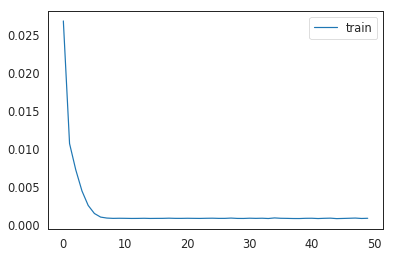

In [339]:
plt.plot(history.history['loss'], label='train')
plt.legend()
plt.show()

In [340]:
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.3f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.3f RMSE' % (testScore))
trainScore_MSE = mean_squared_error(trainY[0], trainPredict[:,0])
print('Train Score: %.3f MSE' % (trainScore_MSE))
testScore_MSE = mean_squared_error(testY[0], testPredict[:,0])
print('Test Score: %.3f MSE' % (testScore_MSE))

Train Score: 9.932 RMSE
Test Score: 12.057 RMSE
Train Score: 98.636 MSE
Test Score: 145.361 MSE


In [341]:
from sklearn.metrics import r2_score


In [342]:
print("Training r2 score",r2_score(trainY[0], trainPredict[:,0]))
print("Testing r2 score",r2_score(testY[0], testPredict[:,0]))


Training r2 score 0.9809742061034514
Testing r2 score 0.853988753913123


In [ ]:
#PLOTTING TRUE VALUES

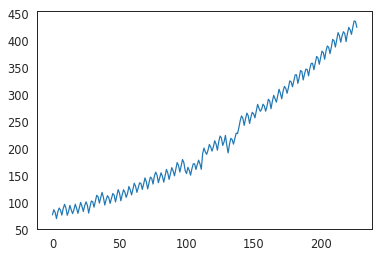

In [343]:
trainPredictPlot = np.empty_like(X)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
testPredictPlot = np.empty_like(X)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(X)-1, :] = testPredict
plt.plot(scaler.inverse_transform(X))
plt.show()

In [ ]:
#PLOTTING PREDICTED TRAIN VALUES

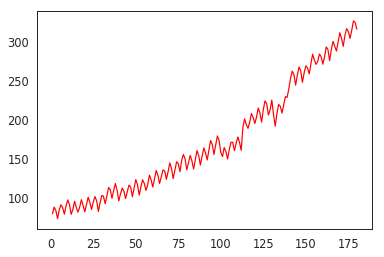

In [344]:
#plt.plot(minmax.inverse_transform(house_0))
plt.plot(trainPredictPlot,color="red")
#plt.plot(testPredictPlot)
plt.show()

In [ ]:
#PLOTTING TEST VALUES

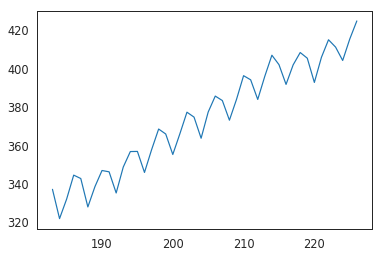

In [345]:
plt.plot(testPredictPlot)
plt.show()

In [ ]:
#COMPARING TRUE AND TRAIN VALUES

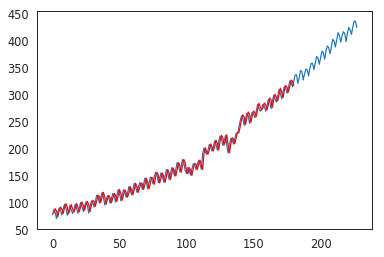

In [346]:
plt.plot(scaler.inverse_transform(X))
plt.plot(trainPredictPlot,color="red")
#plt.plot(testPredictPlot)
plt.show()

In [ ]:
#PLOTING TRUE AND TEST

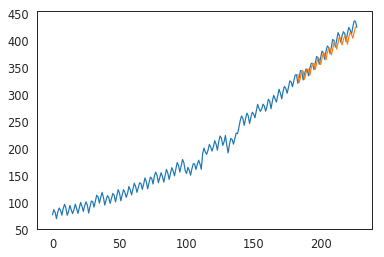

In [347]:
plt.plot(scaler.inverse_transform(X))
#plt.plot(trainPredictPlot,color="red")
plt.plot(testPredictPlot)
plt.show()

In [ ]:
#PLOTTING  TRUE , TRAIN AND TEST VALUES 

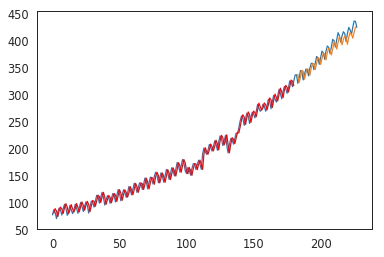

In [348]:
plt.plot(scaler.inverse_transform(X))
plt.plot(trainPredictPlot,color="red")
plt.plot(testPredictPlot)
plt.show()

In [349]:
from pandas.plotting import autocorrelation_plot

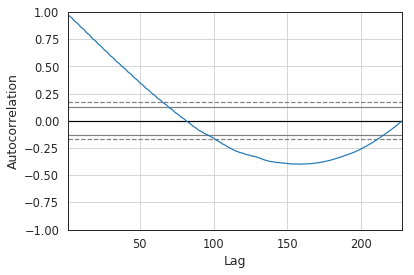

In [350]:
autocorrelation_plot(data)
plt.show()

In [ ]:
#######################################################################################################

ARIMA MODEL 


######################################################################################################

In [351]:
from statsmodels.tsa.arima_model import ARIMA

                             ARIMA Model Results                              
Dep. Variable:                  D.GDP   No. Observations:                  227
Model:                 ARIMA(5, 1, 0)   Log Likelihood                -648.153
Method:                       css-mle   S.D. of innovations              4.163
Date:                Sat, 12 Oct 2019   AIC                           1310.306
Time:                        21:03:35   BIC                           1334.281
Sample:                    06-30-1959   HQIC                          1319.980
                         - 12-31-2015                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const           1.5798      0.258      6.123      0.000       1.074       2.086
ar.L1.D.GDP    -0.0654      0.066     -0.990      0.323      -0.195       0.064
ar.L2.D.GDP    -0.3447      0.052     -6.568    

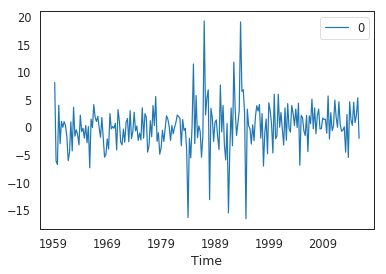

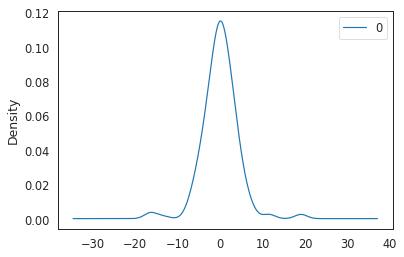

                0
count  227.000000
mean    -0.002847
std      4.231259
min    -16.711061
25%     -2.144996
50%     -0.008833
75%      2.079070
max     19.159483


In [353]:
model = ARIMA(data, order=(5,1,0))
model_fit = model.fit(disp=0)
print(model_fit.summary())
# plot residual errors
residuals = DataFrame(model_fit.resid)
residuals.plot()
plt.show()
residuals.plot(kind='kde')
plt.show()
print(residuals.describe())

predicted=260.718590, expected=263.182288
predicted=252.476724, expected=255.828109
predicted=265.232045, expected=268.730656
predicted=276.682884, expected=280.852218
predicted=275.475512, expected=273.735574
predicted=265.229357, expected=267.912837
predicted=278.478813, expected=271.743139
predicted=281.134517, expected=281.195220
predicted=276.561573, expected=277.828138
predicted=272.857742, expected=268.122623
predicted=272.411304, expected=277.282746
predicted=287.430094, expected=290.352523
predicted=286.378794, expected=287.087230
predicted=277.484158, expected=272.766304
predicted=279.890421, expected=286.703882
predicted=299.979326, expected=297.640399
predicted=291.973961, expected=291.162760
predicted=279.364356, expected=284.937501
predicted=296.657679, expected=297.109588
predicted=305.842130, expected=308.888916
predicted=301.448714, expected=301.301086
predicted=294.174419, expected=291.036696
predicted=301.398293, expected=305.374633
predicted=316.545247, expected=314

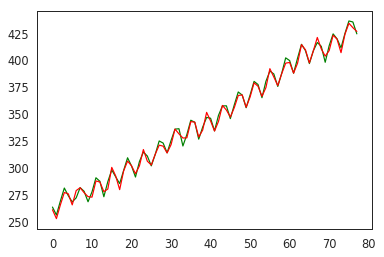

In [421]:
X = data.values
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()
for t in range(len(test)):
    model = ARIMA(history, order=(5,1,0))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))
error = mean_squared_error(test, predictions)
# plot
plt.plot(test,color='green')
plt.plot(predictions, color='red')
plt.show()

In [422]:
print('Test MSE: %.3f' % error)
print('Test RMSE: %.3f'%math.sqrt(error))
print("r2 score for the ARIMA MODEL", r2_score(test, predictions))

Test MSE: 10.373
Test RMSE: 3.221
r2 score for the ARIMA MODEL 0.9960187622022295


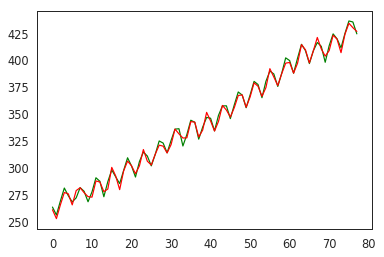

In [357]:
plt.plot(test,color='green')
plt.plot(predictions, color='red')
plt.show()

In [ ]:
#######################################################################################################

Holt Winters & Exponential Smoothing Methods (All statistcal methods below)

######################################################################################################

In [411]:
true_data=pd.read_csv("GDP_training.csv")

In [412]:
X = true_data
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]

In [ ]:
#######################################################################################################

Simple Exponential Smoothing 

######################################################################################################

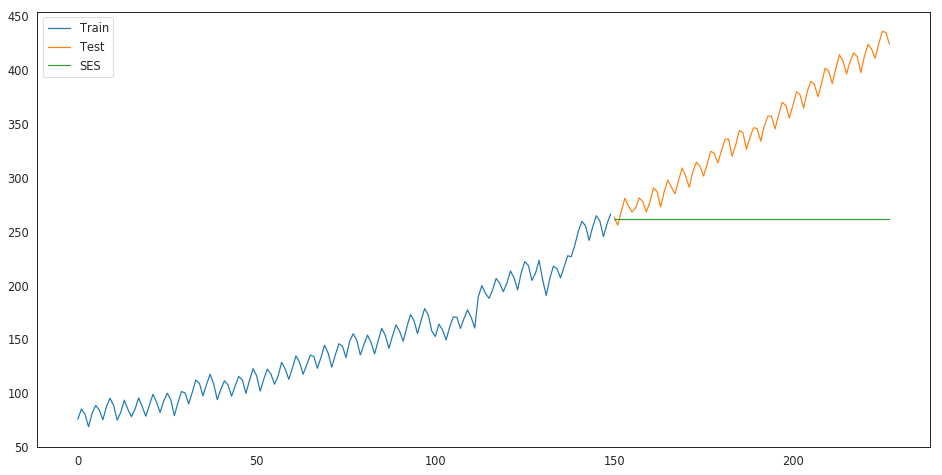

In [413]:
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt
y_hat_avg = test.copy()
fit2 = SimpleExpSmoothing(np.asarray(train['GDP'])).fit(smoothing_level=0.6,optimized=False)
y_hat_avg['SES'] = fit2.forecast(len(test))
plt.figure(figsize=(16,8))
plt.plot(train['GDP'], label='Train')
plt.plot(test['GDP'], label='Test')
plt.plot(y_hat_avg['SES'], label='SES')
plt.legend(loc='best')
plt.show()

In [414]:
rms = math.sqrt(mean_squared_error(test.GDP, y_hat_avg.SES))
mse=mean_squared_error(test.GDP, y_hat_avg.SES)
print("Mean Squared Error:",mse)
print("Root Mean Squared Error:",rms)
print("R2 Score", r2_score(test.GDP, y_hat_avg.SES))

Mean Squared Error: 9367.194610706285
Root Mean Squared Error: 96.78426840507855
R2 Score -2.5950976430966257


In [ ]:
#######################################################################################################

Holt Linear Method

######################################################################################################

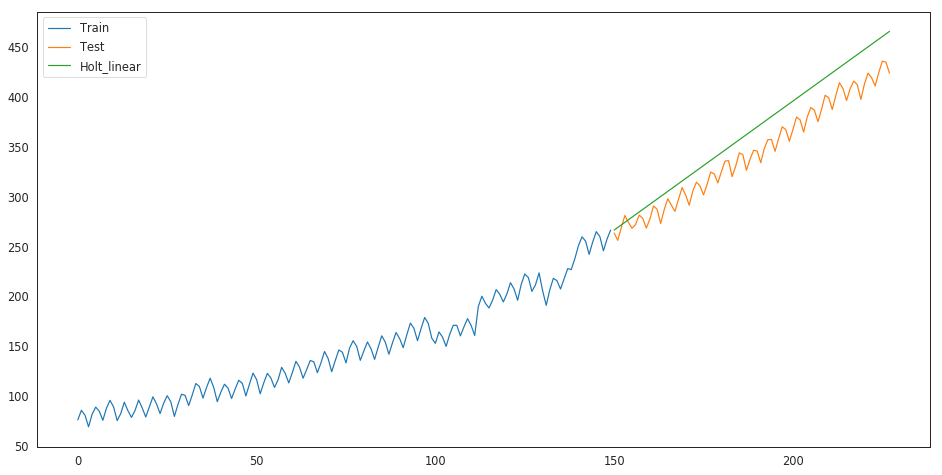

In [415]:
y_hat_avg = test.copy()

fit1 = Holt(np.asarray(train['GDP'])).fit(smoothing_level = 0.3,smoothing_slope = 0.1)
y_hat_avg['Holt_linear'] = fit1.forecast(len(test))

plt.figure(figsize=(16,8))
plt.plot(train['GDP'], label='Train')
plt.plot(test['GDP'], label='Test')
plt.plot(y_hat_avg['Holt_linear'], label='Holt_linear')
plt.legend(loc='best')
plt.show()

In [416]:
rms = math.sqrt(mean_squared_error(test.GDP, y_hat_avg.Holt_linear))
mse=mean_squared_error(test.GDP, y_hat_avg.Holt_linear)
print("Mean Squared Error:",mse)
print("Root Mean Squared Error:",rms)
print("R2 Score", r2_score(test.GDP, y_hat_avg.Holt_linear))

Mean Squared Error: 612.1065497710886
Root Mean Squared Error: 24.740787169592817
R2 Score 0.765075574292982


In [ ]:
#######################################################################################################

Exponential Smoothing  (Holt Winter)

######################################################################################################

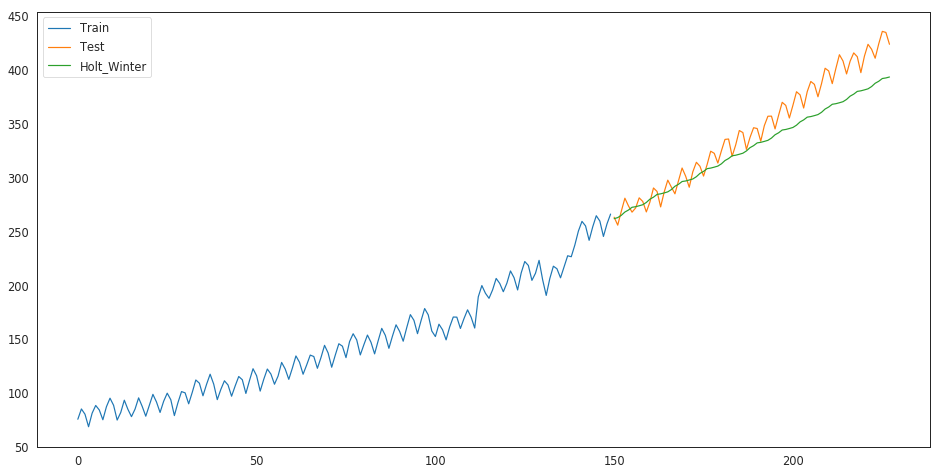

In [417]:
y_hat_avg = test.copy()
fit1 = ExponentialSmoothing(np.asarray(train['GDP']) ,seasonal_periods=7 ,trend='add', seasonal='add',).fit()
y_hat_avg['Holt_Winter'] = fit1.forecast(len(test))
plt.figure(figsize=(16,8))
plt.plot( train['GDP'], label='Train')
plt.plot(test['GDP'], label='Test')
plt.plot(y_hat_avg['Holt_Winter'], label='Holt_Winter')
plt.legend(loc='best')
plt.show()

In [419]:
rms = math.sqrt(mean_squared_error(test.GDP, y_hat_avg.Holt_Winter))
mse=mean_squared_error(test.GDP, y_hat_avg.Holt_Winter)
print("Mean Squared Error:",mse)
print("Root Mean Squared Error:",rms)
print("R2 Score", r2_score(test.GDP, y_hat_avg.Holt_Winter))

Mean Squared Error: 442.21543076649573
Root Mean Squared Error: 21.02891891578109
R2 Score 0.8302792117639459
